In [246]:
import pandas as pd
import geopandas as gpd
import numpy as np
import re
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import jellyfish
#import folium
%matplotlib inline

In [247]:
ls ../Data

538_approval_polllist.csv    pollster-ratings_528csv.csv
538_approval_topline.csv     raw-polls_528.csv
dkos18.csv                   special-elections_538.csv
pollster-ratings.csv         standardized_report.csv


In [248]:
df = pd.read_csv('../Data/standardized_report.csv')

In [249]:
df.shape

(88, 23)

In [250]:
df.size

2024

In [251]:
df.head()

,date_approved,applicant,company,address,zip,naics_code,naics_broader,num_employees,num_emp_existing_in_chi,tif_district,...,end_date,contract_award,amount_spent,training_activities,emp_contribution,# to be trained,Trained to date,num_chicago_residents,Hiring Goal,Hired to date
0,NaN,IHHP,Easter Seals,2214 S. Federal St,60616,Educational Services,education,0.0,NaN,24th Michigan,...,12/31/17,"$3,693.00","$3,693.00","Advanced Qi & Psychosomatic Module, Applied Er...",0,0,0,NaN,0,0
1,NaN,"Advertising Flag Co, Inc.","Advertising Flag Co, Inc.",3801 S. Ashland Ave,60609,Manufacturing,manufacture,15.0,7.0,35th/Halsted,...,7/6/16,"$48,304.60","$42,004.00","Marketing Automation Platform, Strategic Plann...","$22,402.80",15,13,NaN,0,0
2,NaN,TLS Global Consulting Group,"T and T Cleaning, LLC",710 E. 47th St.,60653,commercial and residential cleaning,cleaning,7.0,NaN,43rd/Cottage Grove,...,2/29/2018,"$29,710.40","$28,480.40",PMP Certification,0,3,3,NaN,0,0
3,NaN,"Chicago Ornamental Iron, Inc.","Chicago Ornamental Iron, Inc.",1237 W. 47th St.,60609,Manufacturing,manufacture,60.0,36.0,47th/Haslted,...,10/1/18,"$115,350.75","$24,395.39",Steel Bridges Fabrication & Steel Structures,"$34,605.22",36,11,6.0,0,0
4,1/22/18,Evanston Technology Partners,Evanston Technology Partners,56 E. 47th Street,60653,Professional/ Scientific/ Tech Services,professional_tech_scientific,11.0,11.0,47th/King,...,TBD,"$499,050.00",NaN,Network Technician & Storage Adminstrator,0,0,0,NaN,50,0


In [252]:
df.dtypes

date_approved               object
applicant                   object
company                     object
address                     object
zip                          int64
naics_code                  object
naics_broader               object
num_employees              float64
num_emp_existing_in_chi    float64
tif_district                object
ward                         int64
po_#                        object
start_date                  object
end_date                    object
contract_award              object
amount_spent                object
training_activities         object
emp_contribution            object
# to be trained              int64
Trained to date              int64
num_chicago_residents      float64
Hiring Goal                  int64
Hired to date                int64
dtype: object

In [253]:
 df[df['start_date']=='TBD']

,date_approved,applicant,company,address,zip,naics_code,naics_broader,num_employees,num_emp_existing_in_chi,tif_district,...,end_date,contract_award,amount_spent,training_activities,emp_contribution,# to be trained,Trained to date,num_chicago_residents,Hiring Goal,Hired to date
4,1/22/18,Evanston Technology Partners,Evanston Technology Partners,56 E. 47th Street,60653,Professional/ Scientific/ Tech Services,professional_tech_scientific,11.0,11.0,47th/King,...,TBD,"$499,050.00",NaN,Network Technician & Storage Adminstrator,0,0,0,NaN,50,0
38,5/8/18,"Mintex, Inc.","Mintex, Inc.",700 N. Sacramento Blvd,60612,Finance & Insurance,finance_or_insurance,24.0,22.0,Kinzie Industrial Corridor,...,TBD,"$451,950.00",NaN,OJT and Staff Development training,0,23,0,25.0,25,0
73,4/9/18,Rowboat Creative,Rowboat Creative,4200 W. Diversey Ave,60639,Manufacturing,manufacture,20.0,18.0,Pulaski Industrial Corridor,...,TBD,"$41,221.75",NaN,"Lean Manufacturing Overview, 5S / Workplace Or...","$35,910.00",20,0,NaN,0,0


In [254]:
df.loc[df.index.isin([29, 33, 34]), 'start_date'] = np.nan

In [255]:
df.loc[df['end_date']=='TBD', 'end_date'] = np.nan

In [256]:
df.loc[df['end_date']=='2/29/2018', 'end_date'] = '2/28/2018'

In [257]:
df['date_approved'] = pd.to_datetime(df['date_approved'])
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

ValueError: ('Unknown string format:', 'TBD')

In [258]:
df.head()

,date_approved,applicant,company,address,zip,naics_code,naics_broader,num_employees,num_emp_existing_in_chi,tif_district,...,end_date,contract_award,amount_spent,training_activities,emp_contribution,# to be trained,Trained to date,num_chicago_residents,Hiring Goal,Hired to date
0,NaT,IHHP,Easter Seals,2214 S. Federal St,60616,Educational Services,education,0.0,NaN,24th Michigan,...,12/31/17,"$3,693.00","$3,693.00","Advanced Qi & Psychosomatic Module, Applied Er...",0,0,0,NaN,0,0
1,NaT,"Advertising Flag Co, Inc.","Advertising Flag Co, Inc.",3801 S. Ashland Ave,60609,Manufacturing,manufacture,15.0,7.0,35th/Halsted,...,7/6/16,"$48,304.60","$42,004.00","Marketing Automation Platform, Strategic Plann...","$22,402.80",15,13,NaN,0,0
2,NaT,TLS Global Consulting Group,"T and T Cleaning, LLC",710 E. 47th St.,60653,commercial and residential cleaning,cleaning,7.0,NaN,43rd/Cottage Grove,...,2/28/2018,"$29,710.40","$28,480.40",PMP Certification,0,3,3,NaN,0,0
3,NaT,"Chicago Ornamental Iron, Inc.","Chicago Ornamental Iron, Inc.",1237 W. 47th St.,60609,Manufacturing,manufacture,60.0,36.0,47th/Haslted,...,10/1/18,"$115,350.75","$24,395.39",Steel Bridges Fabrication & Steel Structures,"$34,605.22",36,11,6.0,0,0
4,2018-01-22,Evanston Technology Partners,Evanston Technology Partners,56 E. 47th Street,60653,Professional/ Scientific/ Tech Services,professional_tech_scientific,11.0,11.0,47th/King,...,NaN,"$499,050.00",NaN,Network Technician & Storage Adminstrator,0,0,0,NaN,50,0


In [259]:
df.naics_code.unique()

array(['Educational Services', 'Manufacturing',
       'commercial and residential cleaning',
       'Professional/ Scientific/ Tech Services', 'Finance and Insurance',
       'non-profit services', 'property management, realtor',
       'Healthcare', 'Coffee House and Rosteria', 'Brewery and Taproom',
       'Food and Beverage', 'Food Services',
       'Professional Scientific Tech Service',
       'Professional/ Scientific/Tech Services', 'Marketing',
       'Financial Insurance', 'Accommodation and Food Services',
       'Other Services', 'Construction', 'Bakery',
       'Manufacturer of aluminum and brass',
       'Printer and manufacturer of novelty products',
       'Industrial equipment supplier', 'Packaging and Label Supplier',
       'Finance & Insurance', 'Food Manufacturing',
       'Engineering Design Consultant',
       'Manufacturing - Industrial Sewing',
       'Art glass restoration and fabrication',
       'Manufactured stone fabrication and installation',
       'Manu

In [260]:
cat = ['Professional/Scientific/Tech Services', 'Professional/ Scientific/ Tech Services', 'Professional Scientific Tech Service'
      , 'Professional/ Scientific/\n Tech Services']
df.loc[df.naics_code.isin(cat), 'naics_code'] = 'Professional/Scientific/Tech Services'

In [261]:
df.naics_code.unique()

array(['Educational Services', 'Manufacturing',
       'commercial and residential cleaning',
       'Professional/Scientific/Tech Services', 'Finance and Insurance',
       'non-profit services', 'property management, realtor',
       'Healthcare', 'Coffee House and Rosteria', 'Brewery and Taproom',
       'Food and Beverage', 'Food Services',
       'Professional/ Scientific/Tech Services', 'Marketing',
       'Financial Insurance', 'Accommodation and Food Services',
       'Other Services', 'Construction', 'Bakery',
       'Manufacturer of aluminum and brass',
       'Printer and manufacturer of novelty products',
       'Industrial equipment supplier', 'Packaging and Label Supplier',
       'Finance & Insurance', 'Food Manufacturing',
       'Engineering Design Consultant',
       'Manufacturing - Industrial Sewing',
       'Art glass restoration and fabrication',
       'Manufactured stone fabrication and installation',
       'Manufacturer of water-based architectural paint produ

In [262]:
df.head()

,date_approved,applicant,company,address,zip,naics_code,naics_broader,num_employees,num_emp_existing_in_chi,tif_district,...,end_date,contract_award,amount_spent,training_activities,emp_contribution,# to be trained,Trained to date,num_chicago_residents,Hiring Goal,Hired to date
0,NaT,IHHP,Easter Seals,2214 S. Federal St,60616,Educational Services,education,0.0,NaN,24th Michigan,...,12/31/17,"$3,693.00","$3,693.00","Advanced Qi & Psychosomatic Module, Applied Er...",0,0,0,NaN,0,0
1,NaT,"Advertising Flag Co, Inc.","Advertising Flag Co, Inc.",3801 S. Ashland Ave,60609,Manufacturing,manufacture,15.0,7.0,35th/Halsted,...,7/6/16,"$48,304.60","$42,004.00","Marketing Automation Platform, Strategic Plann...","$22,402.80",15,13,NaN,0,0
2,NaT,TLS Global Consulting Group,"T and T Cleaning, LLC",710 E. 47th St.,60653,commercial and residential cleaning,cleaning,7.0,NaN,43rd/Cottage Grove,...,2/28/2018,"$29,710.40","$28,480.40",PMP Certification,0,3,3,NaN,0,0
3,NaT,"Chicago Ornamental Iron, Inc.","Chicago Ornamental Iron, Inc.",1237 W. 47th St.,60609,Manufacturing,manufacture,60.0,36.0,47th/Haslted,...,10/1/18,"$115,350.75","$24,395.39",Steel Bridges Fabrication & Steel Structures,"$34,605.22",36,11,6.0,0,0
4,2018-01-22,Evanston Technology Partners,Evanston Technology Partners,56 E. 47th Street,60653,Professional/Scientific/Tech Services,professional_tech_scientific,11.0,11.0,47th/King,...,NaN,"$499,050.00",NaN,Network Technician & Storage Adminstrator,0,0,0,NaN,50,0


In [263]:
df.start_date.unique()

array(['11/1/16', '7/5/15', '4/1/17', '11/2/16', 'TBD', '10/12/15',
       '9/21/15', '6/15/16', '7/13/15', '1/31/18', '7/1/15', '7/1/17',
       '2/1/16', '8/1/17', nan, '5/16/16', '11/9/17', '6/19/17',
       '11/15/16', '3/30/15', '4/1/15', '1/1/16', '1/31/16', '10/15/15',
       '8/15/17', '2/12/16', '4/9/16', '3/1/15', '4/1/18', '2/23/16',
       '5/17/17', '7/7/15', '10/1/15', '1/30/17', '8/10/15', '8/17/15',
       '8/4/16', '9/1/15', '10/1/17', '9/26/17', '5/4/15', '1/8/2018'],
      dtype=object)

In [264]:
df.columns

Index(['date_approved', 'applicant', 'company', 'address', 'zip', 'naics_code',
       'naics_broader', 'num_employees', 'num_emp_existing_in_chi',
       'tif_district', 'ward', 'po_#', 'start_date', 'end_date',
       'contract_award', 'amount_spent', 'training_activities',
       'emp_contribution', '# to be trained', 'Trained to date',
       'num_chicago_residents', 'Hiring Goal', 'Hired to date'],
      dtype='object')

In [265]:
df.groupby(by='naics_broader').count()

,date_approved,applicant,company,address,zip,naics_code,num_employees,num_emp_existing_in_chi,tif_district,ward,...,end_date,contract_award,amount_spent,training_activities,emp_contribution,# to be trained,Trained to date,num_chicago_residents,Hiring Goal,Hired to date
naics_broader,,,,,,,,,,,,,,,,,,,,,
cleaning,0,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,0,1,1
construction_industrial,0,2,2,2,2,2,0,0,2,2,...,2,1,1,2,2,2,2,0,2,2
consulting,1,1,1,1,1,1,0,0,1,1,...,1,1,1,1,1,1,1,0,1,1
education,1,5,5,5,5,5,5,0,5,5,...,5,5,5,5,5,5,5,0,5,5
finance_or_insurance,2,5,5,5,5,5,5,2,5,5,...,4,5,4,5,5,5,5,1,5,5
food_services,4,5,5,5,5,5,5,2,5,5,...,5,5,5,5,5,5,5,0,5,5
healthcare,2,3,3,3,3,3,3,1,3,3,...,3,3,2,3,3,3,3,0,3,3
industrial,3,3,3,3,3,3,3,0,3,3,...,3,3,1,3,3,3,3,0,3,3
manufacture,16,47,47,47,47,47,46,23,47,47,...,46,47,44,47,47,47,47,2,47,47


In [266]:
df.contract_award = df['contract_award'].astype(str).apply(lambda x: x[1:] if '$' in x else x)

In [267]:
df.contract_award = df['contract_award'].astype(str).apply(lambda x: x[:-3] if '.00' in x else x)

In [268]:
df['contract_award'] = df['contract_award'].str.replace(',', '')

In [269]:
df['contract_award'] = df['contract_award'].astype(float)

In [270]:
df.describe()

,zip,num_employees,num_emp_existing_in_chi,ward,contract_award,# to be trained,Trained to date,num_chicago_residents,Hiring Goal,Hired to date
count,88.000000,84.000000,35.000000,88.000000,8.700000e+01,88.000000,88.000000,3.000000,88.000000,88.000000
mean,60629.625000,55.809524,57.057143,24.795455,9.193615e+04,14.579545,12.125000,14.666667,4.647727,3.431818
std,16.562187,112.995946,105.724932,11.758254,2.096905e+05,19.956690,19.257966,9.609024,17.549955,16.977196
min,60607.000000,0.000000,1.000000,1.000000,4.571300e+02,0.000000,0.000000,6.000000,0.000000,0.000000
25%,60612.000000,9.750000,12.500000,21.000000,1.000000e+04,2.000000,0.000000,9.500000,0.000000,0.000000
50%,60626.000000,20.000000,19.000000,27.000000,3.728879e+04,8.000000,5.500000,13.000000,0.000000,0.000000
75%,60646.000000,51.000000,38.000000,32.000000,7.325850e+04,20.000000,16.250000,19.000000,1.250000,0.250000
max,60660.000000,772.000000,478.000000,50.000000,1.702562e+06,120.000000,120.000000,25.000000,150.000000,156.000000


In [271]:
df.index

RangeIndex(start=0, stop=88, step=1)

Text(0,0.5,'Contract Award')

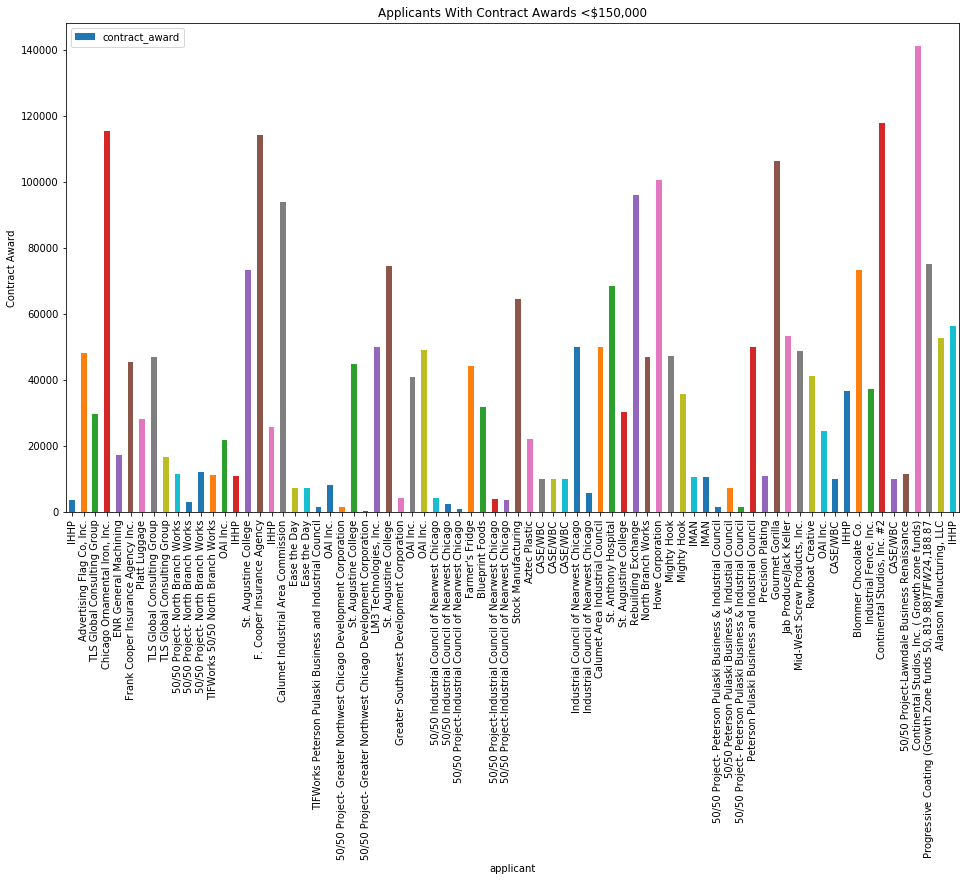

In [295]:
df[df['contract_award'] < 150000].plot.bar(x='applicant', y='contract_award')
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.title('Applicants With Contract Awards <$150,000')
plt.ylabel('Contract Award')

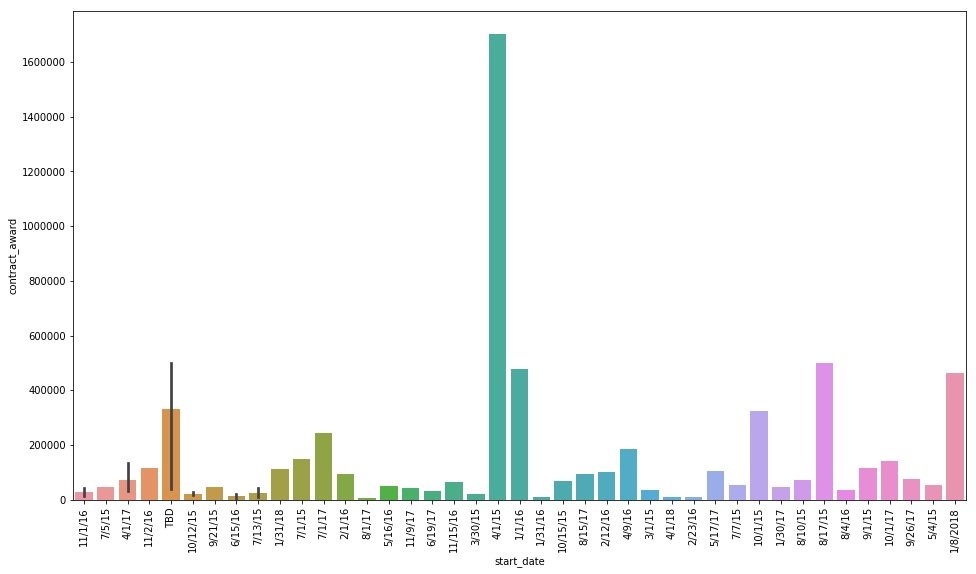

In [276]:
sns.barplot(x=df.start_date, y=df.contract_award)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.xticks(rotation='vertical')
plt.show()

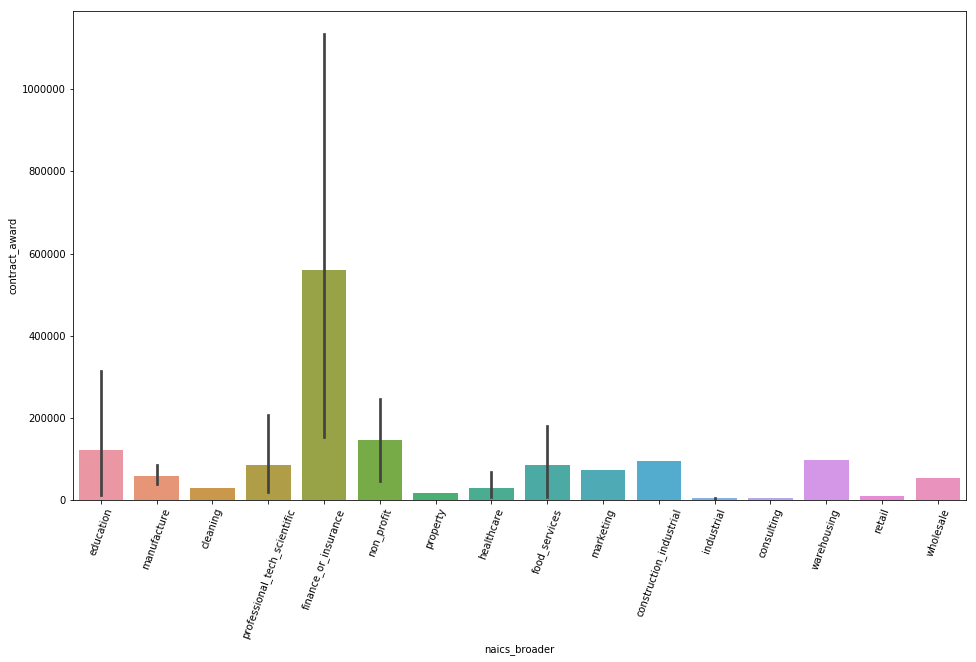

In [277]:
sns.barplot(x=df['naics_broader'], y=df['contract_award'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.xticks(rotation=70)
plt.show()

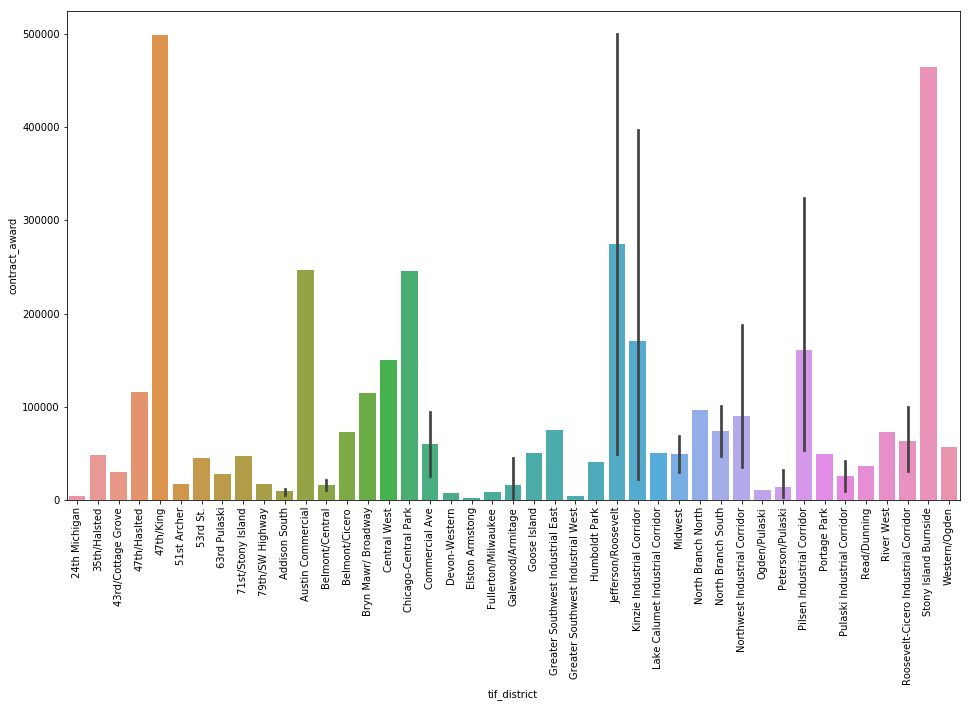

In [287]:
sns.barplot(x=df['tif_district'], y=df['contract_award'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.xticks(rotation=90)
plt.show()

In [278]:
df[df['naics_broader']=='industrial']

,date_approved,applicant,company,address,zip,naics_code,naics_broader,num_employees,num_emp_existing_in_chi,tif_district,...,end_date,contract_award,amount_spent,training_activities,emp_contribution,# to be trained,Trained to date,num_chicago_residents,Hiring Goal,Hired to date
36,2018-02-28,50/50 Industrial Council of Nearwest Chicago,Ayalytical Instrument (#2),2787 W. Fulton St.,60612,Industrial equipment supplier,industrial,17.0,NaN,Kinzie Industrial Corridor,...,6/14/18,4140.0,NaN,OJT New Hire,50%,1,0,NaN,1,1
37,2018-03-21,50/50 Industrial Council of Nearwest Chicago,Elevate Packaging,2010 W Fulton St Suite 239,60612,Packaging and Label Supplier,industrial,3.0,NaN,Kinzie Industrial Corridor,...,6/14/18,2576.0,NaN,OJT New Hire,50%,1,0,NaN,1,0
43,2017-04-07,50/50 Project-Industrial Council of Nearwest C...,Ayalytical Instrument,2701 W. Fulton St #5,60612,Industrial equipment supplier,industrial,13.0,NaN,Kinzie Industrial Corridor,...,6/14/18,3737.5,"$3,737.50",OJT,0,0,0,NaN,1,1


In [279]:
df.tif_district.unique()

array(['24th Michigan', '35th/Halsted', '43rd/Cottage Grove',
       '47th/Haslted', '47th/King', '51st Archer', '53rd St.',
       '63rd Pulaski', '71st/Stony Island', '79th/SW Highway',
       'Addison South', 'Austin Commercial', 'Belmont/Central',
       'Belmont/Cicero', 'Bryn Mawr/ Broadway', 'Central West',
       'Chicago-Central Park', 'Commercial Ave', 'Devon-Western',
       'Elston Armstong', 'Fullerton/Milwaukee', 'Galewood/Armitage',
       'Goose Island', 'Greater Southwest Industrial East',
       'Greater Southwest Industrial West', 'Humboldt Park',
       'Jefferson/Roosevelt', 'Kinzie Industrial Corridor',
       'Lake Calumet Industrial Corridor', 'Midwest',
       'North Branch North', 'North Branch South',
       'Northwest Industrial Corridor', 'Ogden/Pulaski',
       'Peterson/Pulaski', 'Pilsen Industrial Corridor', 'Portage Park',
       'Pulaski Industrial Corridor', 'Read/Dunning', 'River West',
       'Roosevelt-Cicero Industrial Corridor', 'Stony Island Bur

In [280]:
tifs1 = set(df.tif_district.values)

In [281]:
tifs2 = tifs1

In [282]:
test = {}
for tif1 in tifs1:
    for tif2 in tifs2:
        if tif1 not in test.keys() and tif1 != tif2:
            if jellyfish.jaro_winkler(tif1, tif2) > .8:
                test[tif1] = tif2
        else:
            if jellyfish.jaro_winkler(tif1, tif2) > .8 and tif1 != tif2:
                test[tif1] = tif2

In [283]:
test

{'Greater Southwest Industrial West': 'Greater Southwest Industrial East',
 'Pilsen Industrial Corridor': 'Pulaski Industrial Corridor',
 'Greater Southwest Industrial East': 'Greater Southwest Industrial West',
 'Belmont/Central': 'Belmont/Cicero',
 '35th/Halsted': '47th/Haslted',
 'Kinzie Industrial Corridor': 'Pilsen Industrial Corridor',
 'Pulaski Industrial Corridor': 'Pilsen Industrial Corridor',
 '47th/Haslted': '35th/Halsted',
 'Belmont/Cicero': 'Belmont/Central',
 'North Branch North': 'North Branch South',
 'North Branch South': 'North Branch North'}

In [288]:
df.columns

Index(['date_approved', 'applicant', 'company', 'address', 'zip', 'naics_code',
       'naics_broader', 'num_employees', 'num_emp_existing_in_chi',
       'tif_district', 'ward', 'po_#', 'start_date', 'end_date',
       'contract_award', 'amount_spent', 'training_activities',
       'emp_contribution', '# to be trained', 'Trained to date',
       'num_chicago_residents', 'Hiring Goal', 'Hired to date'],
      dtype='object')